In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
!pip install sklearn-features

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import os
import missingno as msno

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet

# Load dataSet

In [4]:
data_dir = "/kaggle/input/california-housing-prices"


In [5]:
path = os.path.join(data_dir,'housing.csv')
path


'/kaggle/input/california-housing-prices/housing.csv'

In [6]:
df = pd.read_csv(path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Analysis

In [10]:

housing_median_age_counts = df['housing_median_age'].value_counts()
housing_median_age_counts

housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

In [11]:
ocean_proximity_counts = df['ocean_proximity'].value_counts()

/tmp/ipykernel_13/177677597.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = ocean_proximity_counts[i]


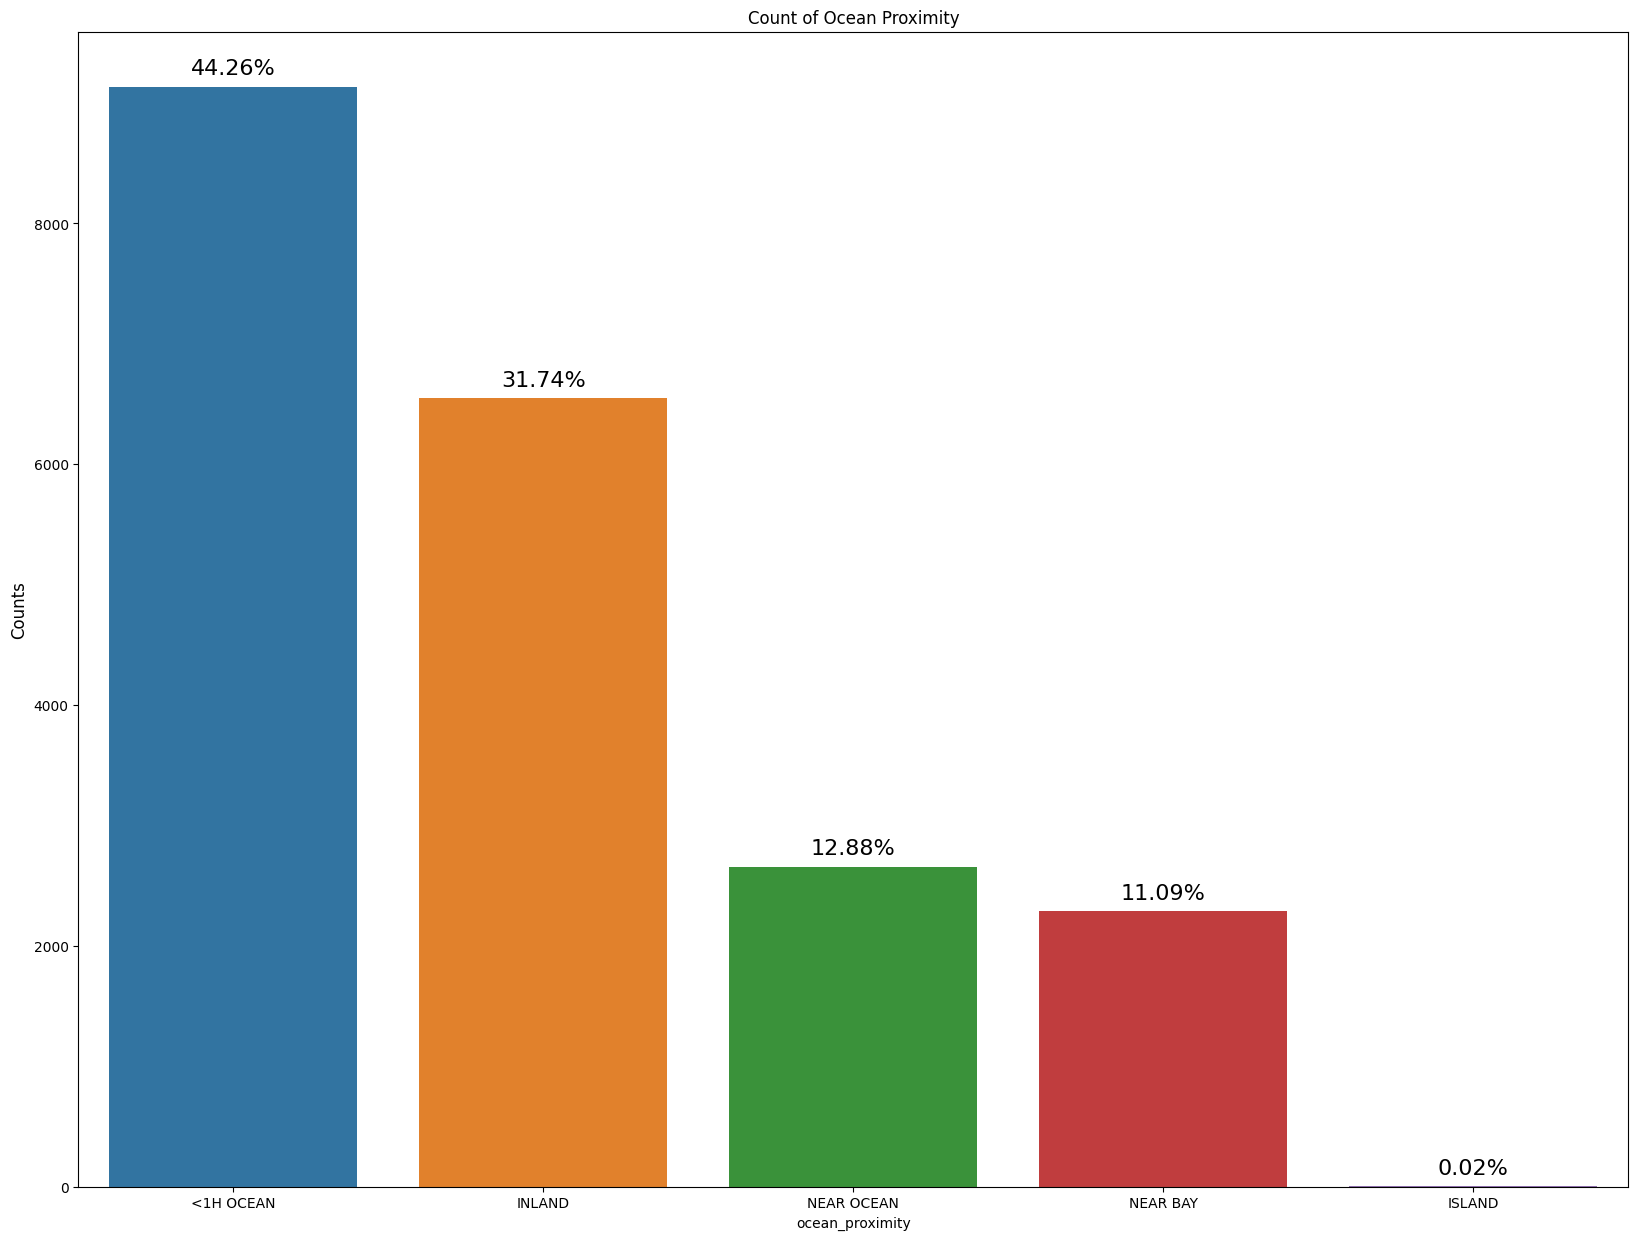

In [12]:
plt.figure(figsize=(20,15))
sns.countplot(
    x='ocean_proximity',
    data=df,
    order=ocean_proximity_counts.index
)

plt.title('Count of Ocean Proximity')
plt.xlabel('ocean_proximity')
plt.ylabel('Counts', fontsize=12)

for i in range(ocean_proximity_counts.shape[0]):
    count = ocean_proximity_counts[i]
    percentage = '{:0.2f}%'.format(100*count /df.shape[0])
    plt.text(i, count+100, percentage, ha='center',fontsize=16)

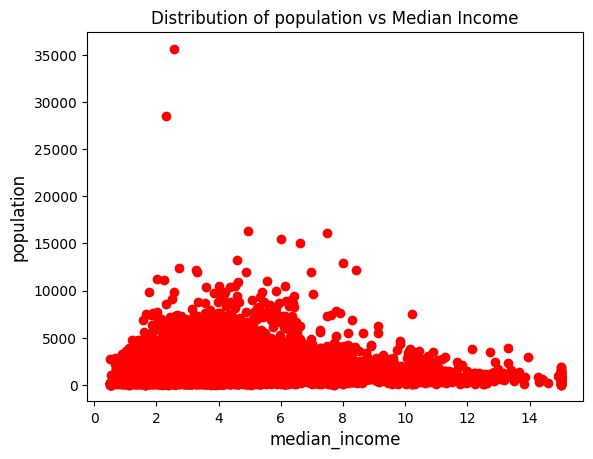

In [13]:
plt.scatter(data=df, x = 'median_income', y='population', color='r')
plt.title('Distribution of population vs Median Income')
plt.xlabel('median_income', fontsize =12)
plt.ylabel('population', fontsize=12)
plt.show()

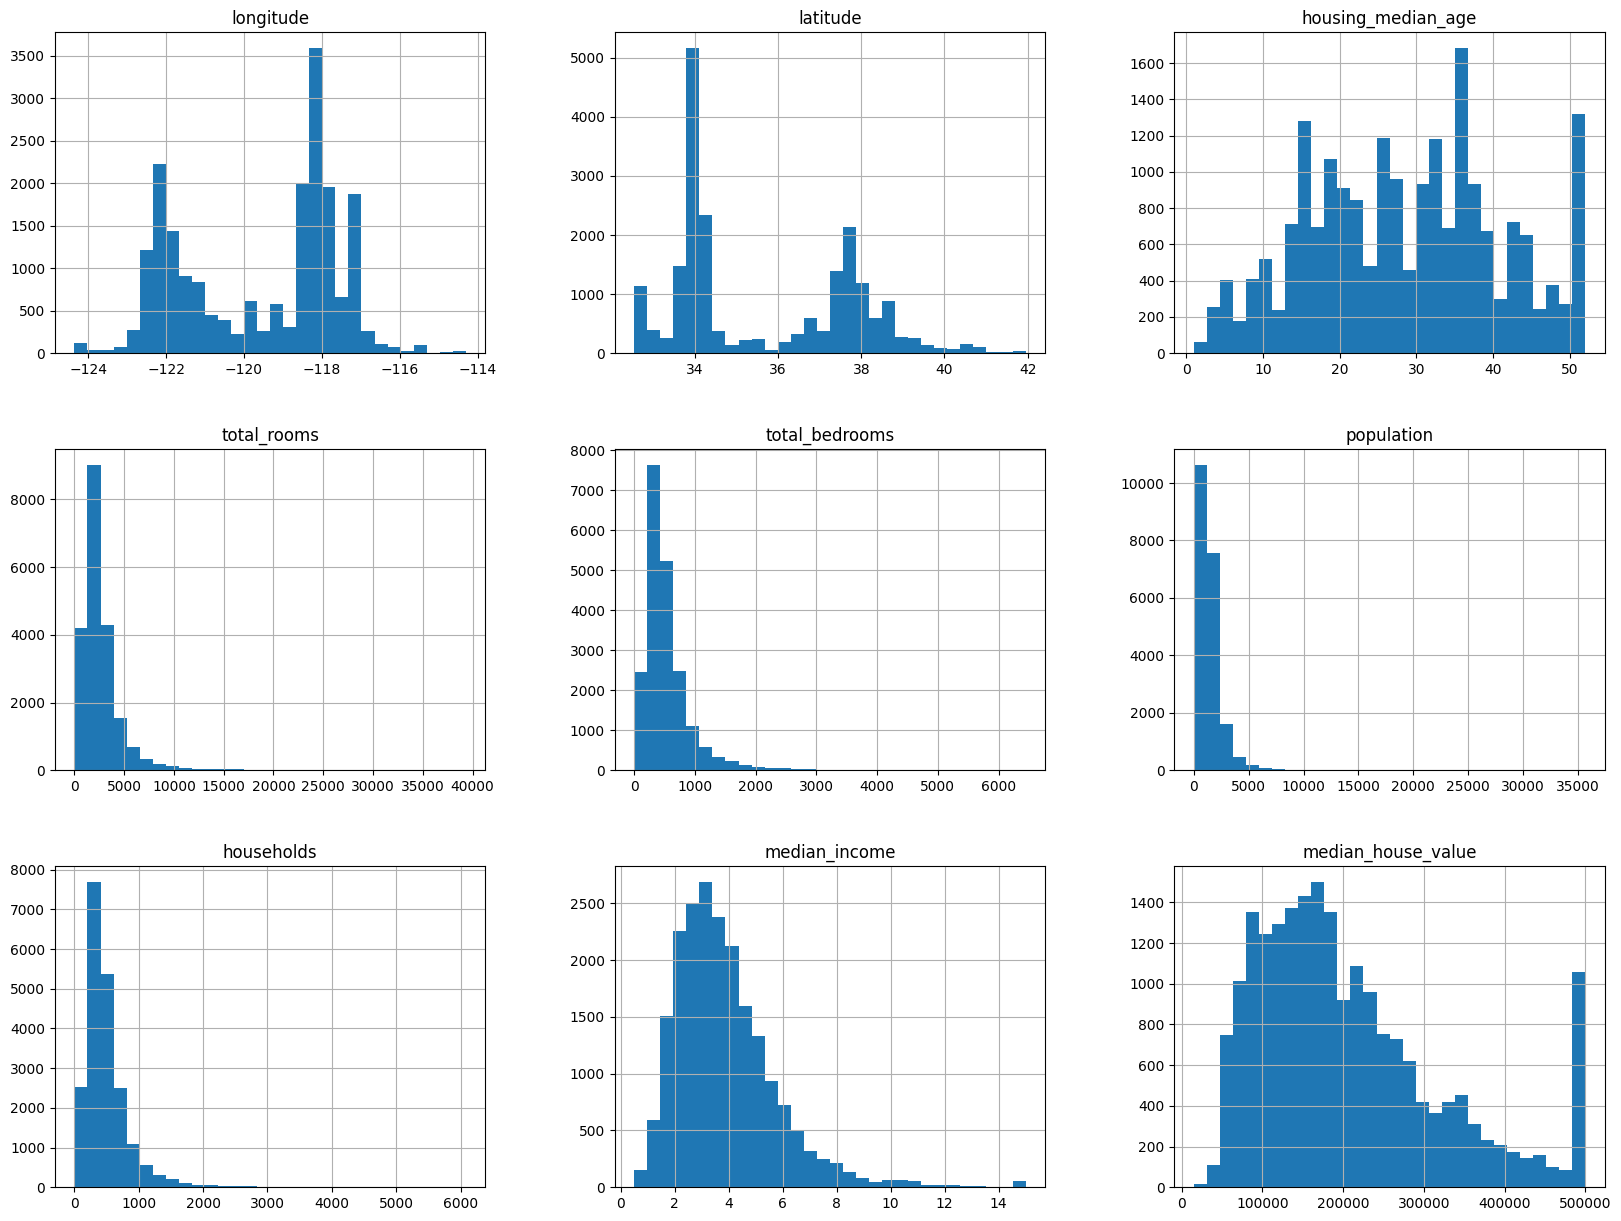

In [14]:
df.hist(bins=30, figsize=(20,15))
plt.show()

 >   Representing the distribution of each Feature

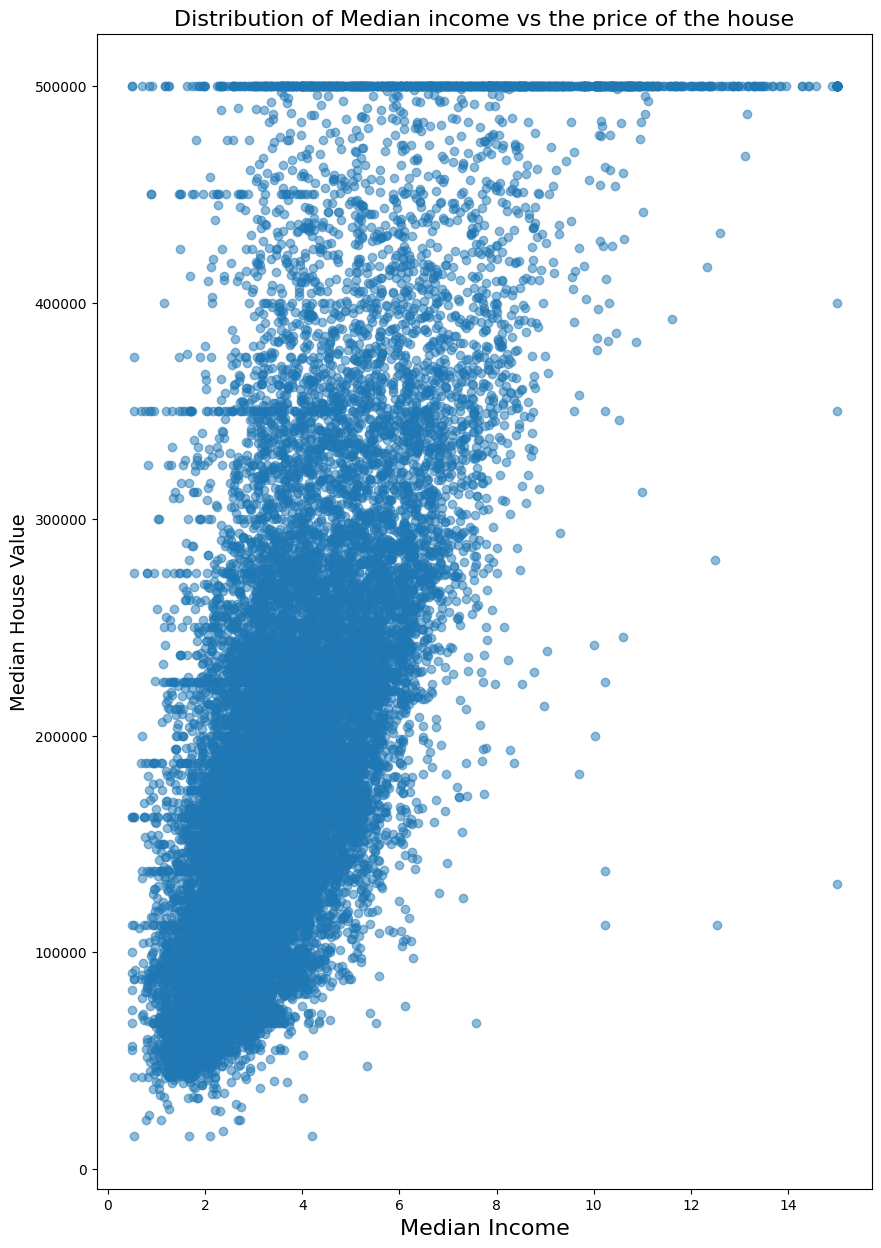

In [15]:
# Median income vs the price of the house
plt.figure(figsize=(10,15))

plt.scatter(df['median_income'], df['median_house_value'],alpha=0.5)
plt.title('Distribution of Median income vs the price of the house', fontsize=16, c='k')
plt.xlabel('Median Income', fontsize=16, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

> From the graph it seems that there is a positive correlation between the median_income & the value of the house

In [16]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [17]:
total_rooms_bins = pd.cut(x=df['total_rooms'],
                          bins = 4,
                          labels = ['One','Two','Three','Four'])

value_count = total_rooms_bins.value_counts()

value_count

total_rooms
One      20334
Two        273
Three       26
Four         7
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


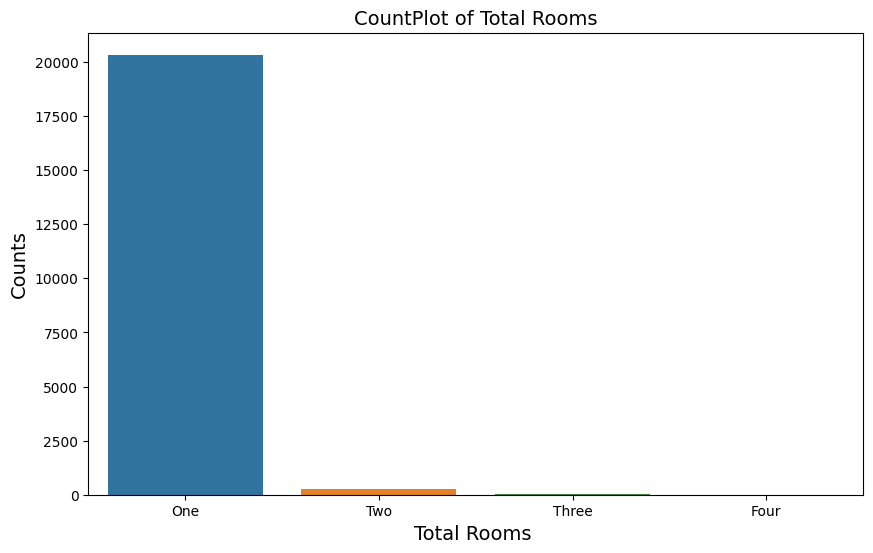

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x=total_rooms_bins)
plt.title('CountPlot of Total Rooms', fontsize=14, c='k')
plt.xlabel('Total Rooms ', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


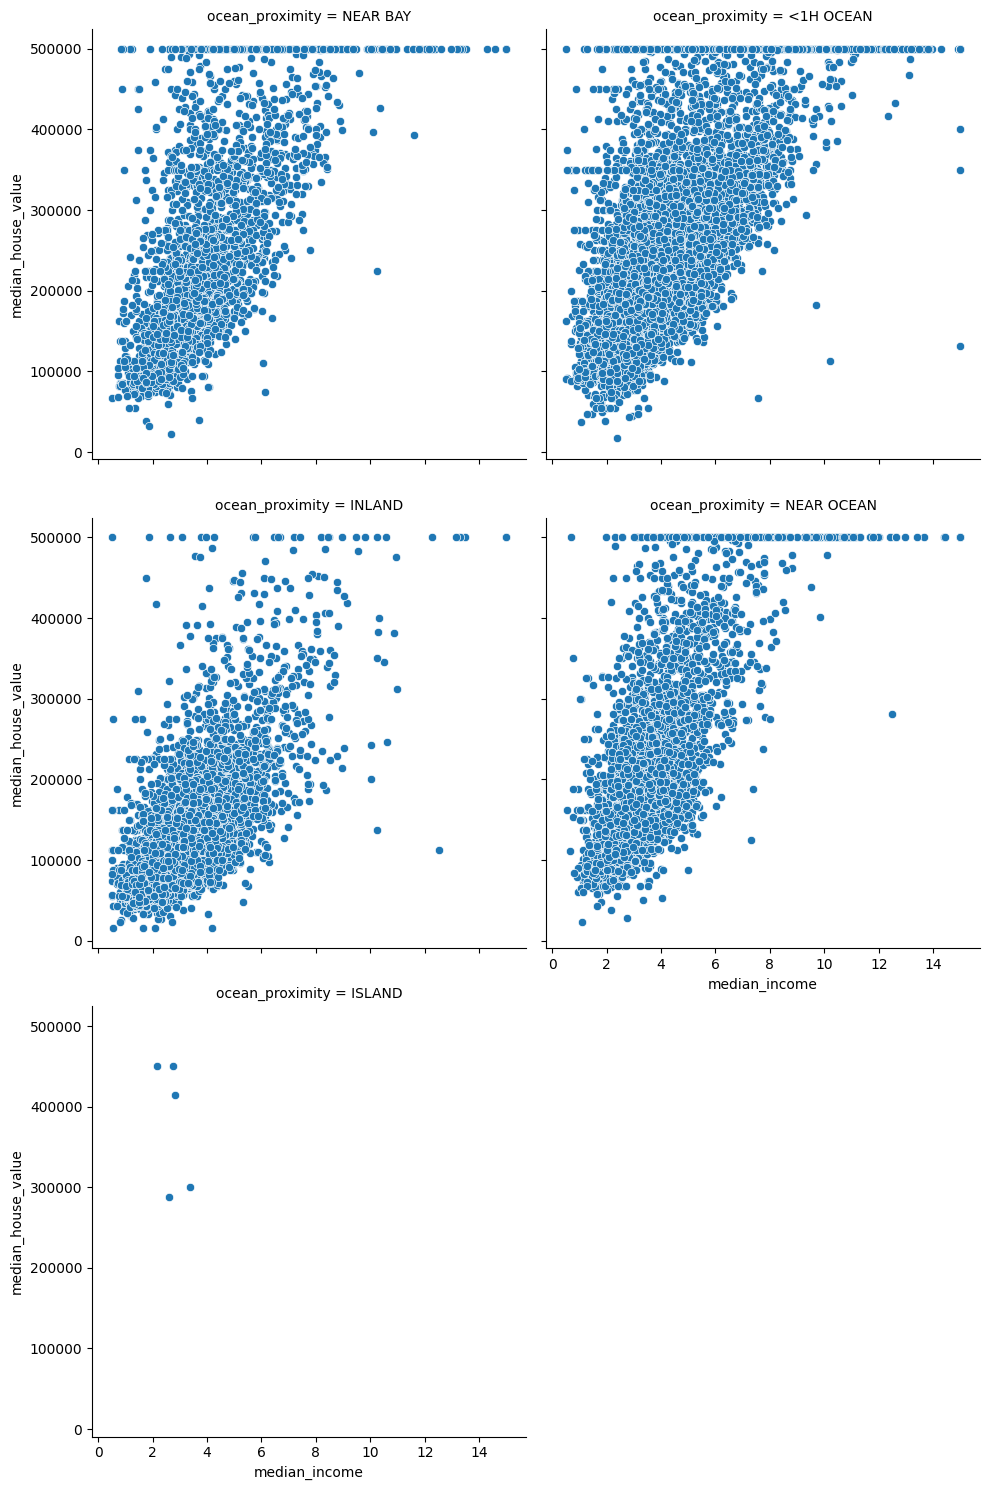

In [19]:
sns.relplot(x='median_income', y='median_house_value', data=df, kind='scatter',col='ocean_proximity' ,col_wrap=2)
plt.show()

# Outliers

In [20]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


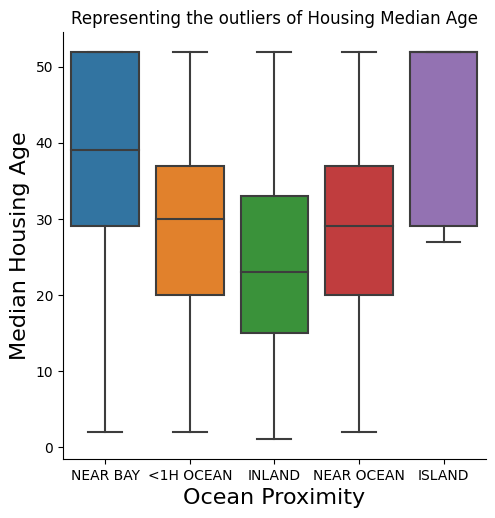

In [21]:
sns.catplot(x='ocean_proximity',y='housing_median_age'
           ,data=df, kind= 'box')
plt.title('Representing the outliers of Housing Median Age')
plt.xlabel('Ocean Proximity', fontsize=16, c='k')
plt.ylabel('Median Housing Age', fontsize=16 , c='k')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


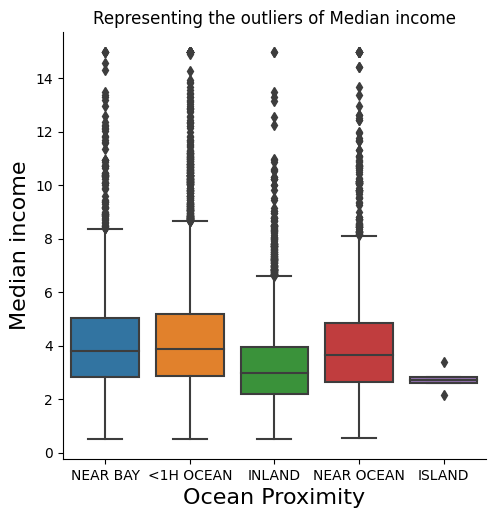

In [22]:
sns.catplot(x='ocean_proximity',y='median_income'
           ,data=df, kind= 'box')
plt.title('Representing the outliers of Median income')
plt.xlabel('Ocean Proximity', fontsize=16, c='k')
plt.ylabel('Median income', fontsize=16 , c='k')
plt.show()

> 

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


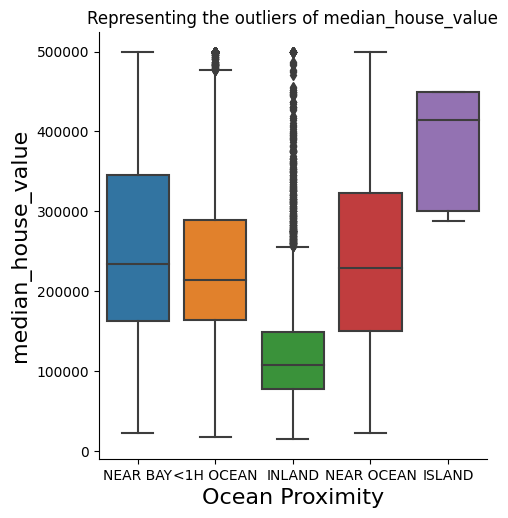

In [23]:
sns.catplot(x='ocean_proximity',y='median_house_value'
           ,data=df, kind= 'box')
plt.title('Representing the outliers of median_house_value')
plt.xlabel('Ocean Proximity', fontsize=16, c='k')
plt.ylabel('median_house_value', fontsize=16 , c='k')
plt.show()

> Median house value in INLAND is the least one compared to other Ocean Proximity

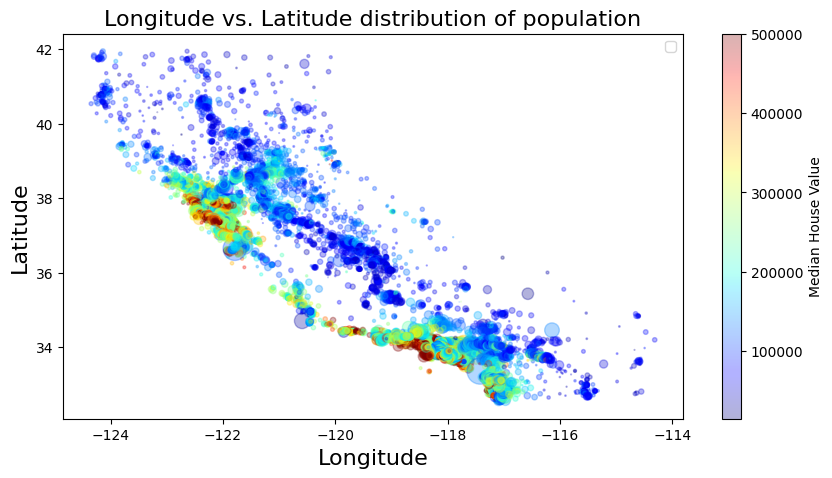

In [24]:
# Longitude vs Latitude --- > Population Distribution

plt.figure(figsize=(10,5))
scatter = plt.scatter(df['longitude'], df['latitude'], 
                      s=df['population']/100, 
                      c=df['median_house_value'], 
                      cmap='jet', 
                      alpha=0.3)

# Add a colorbar linked to the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value')
plt.xlabel('Longitude', fontsize=16, c='k')
plt.ylabel('Latitude', fontsize=16, c='k')
plt.title('Longitude vs. Latitude distribution of population', fontsize=16, c='k')
plt.legend()
plt.show()


> Areas close to the ocean tend to have higher prices and larger populations.


# Pearson Correlation

In [25]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])


In [26]:
numerical_df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

> The highest correlated feature according to pearson with the target is (median_income), while the least ones are the population & total_bedrooms

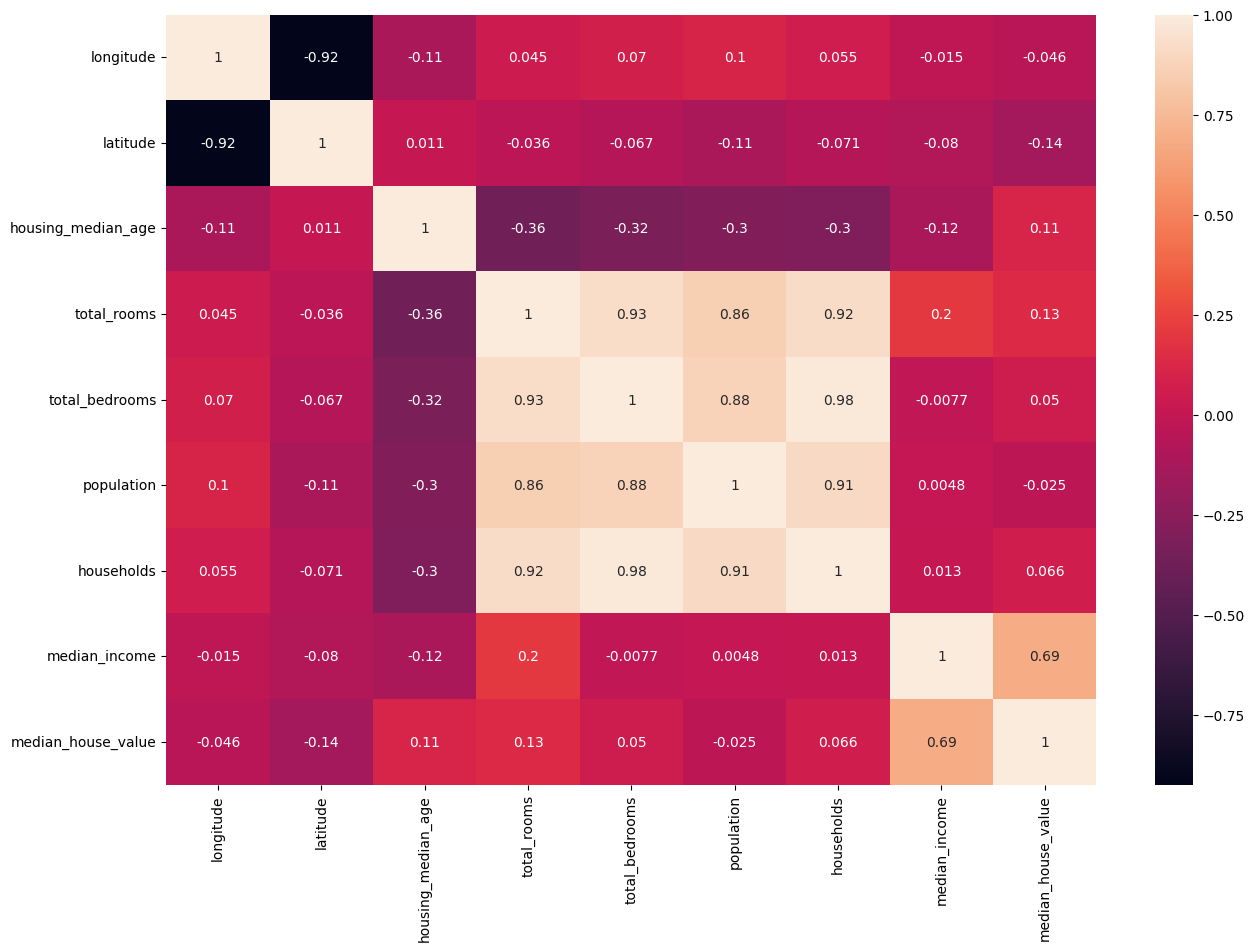

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

# Feature Engineering

In [28]:
numerical_df['median_income_rooms'] = numerical_df['median_income']/numerical_df['total_rooms']

numerical_df['median_income_population'] = numerical_df['median_income']/numerical_df['population']


In [29]:
numerical_df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
total_rooms                 0.134153
median_income_population    0.114455
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
median_income_rooms         0.041348
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
Name: median_house_value, dtype: float64

> Median income per population seems to have a good positive correlation with the target

In [30]:
df_test = df.copy()

# Splitting the DataSet

In [31]:
X = df.drop(columns=['median_house_value'], axis=1) # features
y = df['median_house_value'] # target

In [32]:
# splitting to train, test, validate
# 1- split to train and test
X_train_all, X_test, y_train_all, y_test= train_test_split(X,y, test_size=0.2,random_state=42, shuffle=True)
# 2-Split train into train and valid_set
X_train, X_valid, y_train, y_valid=train_test_split(X_train_all,y_train_all, test_size=0.2, random_state=42, shuffle=True)


In [33]:
# Check shapes
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_valid', X_valid.shape)
print('y_valid', y_valid.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (13209, 9)
y_train (13209,)
X_valid (3303, 9)
y_valid (3303,)
X_test (4128, 9)
y_test (4128,)


# Imputations

In [34]:
# extracting categorical & Numerical Columns

cols_numerical  = [col for col in X_train.columns
                  if X_train[col].dtype in ['float64','int64']]

cols_categorical  = [col for col in X_train.columns
                  if X_train[col].dtype not in ['float64','int64']]


In [35]:
print('Numerical Columns', cols_numerical)
print('Categorical Columns', cols_categorical)

Numerical Columns ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical Columns ['ocean_proximity']


In [36]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), cols_numerical),
    
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='emptyvalue')),
        ('oneHotEncoder', OneHotEncoder(sparse_output=False))
    ]), cols_categorical)
])


> Handle missing values proactively, even if the current dataset has none, as they may arise in production scenarios.


In [37]:
# Apply to dataset

X_train_f = preprocessor.fit_transform(X_train)
X_valid_f = preprocessor.transform(X_valid)
X_test_f = preprocessor.transform(X_test)

# Models

In [38]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_f, y_train)

LinearRegression()

In [39]:
y_pred_train_linear = linear_reg.predict(X_train_f)
y_pred_valid_linear = linear_reg.predict(X_valid_f)


In [40]:
mse_train_linear = (mean_squared_error(y_train, y_pred_train_linear))
mse_valid_linear = (mean_squared_error(y_valid, y_pred_valid_linear))

In [41]:
print('mse_train_linear',mse_train_linear)
print('mse_valid_linear',mse_valid_linear)

mse_train_linear 4638998702.146054
mse_valid_linear 4871132962.3388195


In [42]:
r2_train_linear = r2_score(y_train, y_pred_train_linear)
r2_valid_linear = r2_score(y_valid, y_pred_valid_linear)

In [43]:
print('r2_train_linear',r2_train_linear)
print('r2_valid_linear',r2_valid_linear)

r2_train_linear 0.6501105234928445
r2_valid_linear 0.6470162481990558


# Stochastic Gradient Descent (SGD)

> To built SGD with regularization --> SGD with penalty hyperparameter

In [44]:
sgd_regression = SGDRegressor(eta0=0.002)
sgd_regression.fit(X_train_f, y_train)

SGDRegressor(eta0=0.002)

In [45]:
y_pred_train_sgd_reg = sgd_regression.predict(X_train_f)  
y_pred_valid_sgd_reg = sgd_regression.predict(X_valid_f) 


In [46]:
rmse_train_sgd = (mean_squared_error(y_train, y_pred_train_sgd_reg))
rmse_valid_sgd = (mean_squared_error(y_valid, y_pred_valid_sgd_reg))

print('rmse_train_sgd',rmse_train_sgd)
print('rmse_valid_sgd',rmse_valid_sgd)

rmse_train_sgd 4662700353.979319
rmse_valid_sgd 4866824791.306086


In [47]:
## R2 score
r2_train_sgd = r2_score(y_train, y_pred_train_sgd_reg)
r2_valid_sgd = r2_score(y_valid, y_pred_valid_sgd_reg)

print('r2_train_sgd',r2_train_sgd)
print('r2_valid_sgd',r2_valid_sgd)

r2_train_sgd 0.6483228621709176
r2_valid_sgd 0.6473284372495892


# Regularization

> Linear Regression Model (Regularization)

## Ridge

In [48]:
regression_ridge = Ridge(alpha=0.8)


regression_ridge.fit(X_train_f, y_train)

Ridge(alpha=0.8)

In [49]:
y_pred_ridge_train = regression_ridge.predict(X_train_f)

y_pred_ridge_valid = regression_ridge.predict(X_valid_f)


In [50]:
# MSE
mse_train_ridge = (mean_squared_error(y_train, y_pred_ridge_train))
mse_valid_ridge = (mean_squared_error(y_valid, y_pred_ridge_valid))

## R2 score
r2_train_ridge = r2_score(y_train, y_pred_ridge_train)
r2_valid_ridge = r2_score(y_valid, y_pred_ridge_valid)


In [51]:
print('mse_train_ridge',mse_train_ridge)
print('mse_valid_ridge',mse_valid_ridge)

print('r2_train_ridge', r2_train_ridge)
print('r2_valid_ridge', r2_valid_ridge)

mse_train_ridge 4639433247.458235
mse_valid_ridge 4863100780.316722
r2_train_ridge 0.6500777485684353
r2_valid_ridge 0.6475982954901539


## Lasso

In [52]:
regression_lasso = Lasso(alpha=1, max_iter=10000)
regression_lasso.fit(X_train_f, y_train) 

Lasso(alpha=1, max_iter=10000)

In [53]:
# Lasso can be used as a Feature Selection -> Zeros
regression_lasso.coef_ 

array([-54886.56320303, -55665.46000327,  13896.20825242, -14273.02729878,
        42320.35142528, -42832.23537842,  19247.83514018,  74950.6717747 ,
            0.        , -38078.03400343, 204796.37399271,  -4879.4040513 ,
         5063.54904602])

In [54]:
y_pred_lasso_train = regression_lasso.predict(X_train_f)  
y_pred_lasso_valid = regression_lasso.predict(X_valid_f) 

In [55]:
# MSE
mse_train_lasso = (mean_squared_error(y_train, y_pred_lasso_train))
mse_valid_lasso = (mean_squared_error(y_valid, y_pred_lasso_valid))

## R2 score
r2_train_lasso = r2_score(y_train, y_pred_lasso_train)
r2_valid_lasso = r2_score(y_valid, y_pred_lasso_valid)


In [56]:
print('mse_train_lasso', mse_train_lasso)
print('mse_valid_lasso', mse_valid_lasso)

print('r2_train_lasso', r2_train_lasso)
print('r2_valid_lasso', r2_valid_lasso)

mse_train_lasso 4639005404.766801
mse_valid_lasso 4869915604.553157
r2_train_lasso 0.6501100179577894
r2_valid_lasso 0.6471044633066683


## ElasticNet

In [57]:
elastic_net_regression = ElasticNet(alpha=0.2, l1_ratio = 0.5)
elastic_net_regression.fit(X_train_f, y_train)

ElasticNet(alpha=0.2)

In [58]:
y_pred_elastic_train = elastic_net_regression.predict(X_train_f)
y_pred_elastic_valid = elastic_net_regression.predict(X_valid_f)

In [59]:
## MSE
rmse_train_elastic = (mean_squared_error(y_train, y_pred_elastic_train))
rmse_valid_elastic = (mean_squared_error(y_valid, y_pred_elastic_valid))

## R2 score
r2_train_elastic = r2_score(y_train, y_pred_elastic_train)
r2_valid_elastic = r2_score(y_valid, y_pred_elastic_valid)

In [60]:
print('rmse_train_elastic', rmse_train_elastic)
print('rmse_valid_elastic', rmse_valid_elastic)

print('r2_train_elastic', r2_train_elastic)
print('r2_valid_elastic', r2_valid_elastic)

rmse_train_elastic 4902781964.751237
rmse_valid_elastic 5108311876.558131
r2_train_elastic 0.6302150689798738
r2_valid_elastic 0.6298292193011606


# Evaluating on test data

In [61]:
X_f = df_test.drop(columns=['median_house_value'], axis=1) # features
y_f = df_test['median_house_value'] # target

In [62]:
X_train_ff, X_test_ff, y_train_ff, y_test_ff = train_test_split(X_f,y_f, test_size=0.2,random_state=42, shuffle=True)

In [63]:
print('X_train_ff shape', X_train_ff.shape)
print('X_test_ff shape', X_test_ff.shape)

print('y_train_ff', y_train_ff.shape)
print('y_test_ff', y_test_ff.shape)

X_train_ff shape (16512, 9)
X_test_ff shape (4128, 9)
y_train_ff (16512,)
y_test_ff (4128,)


In [64]:
# Apply to dataset

X_train_tt = preprocessor.fit_transform(X_train_ff)
X_test_tt = preprocessor.transform(X_test_ff)

## 1- Linear Regression

In [65]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train_tt, y_train_ff)

LinearRegression()

In [66]:
final_scores =cross_val_score(estimator = model_lin_reg, X =X_train_tt, y=y_train_ff, cv =5, scoring ='neg_mean_squared_error' )
final_scores = -1 * final_scores

#mse
np.mean(final_scores)

4711122398.103482

In [67]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',